In [2]:
# ** supervised_binning.py **
# Available methods are the followings:
# [1] batch_binning 
# [2] woe_binning
# [3] evaluate_bins
# [4] plot_woe
# [5] woe_transform
# Authors: Danusorn Sitdhirasdr <danusorn.si@gmail.com>
# versionadded:: 08-09-2020

## Example

In [1]:
import pandas as pd, numpy as np
from supervised_binning import *
pd.options.display.float_format = '{:,.4f}'.format

In [2]:
from sklearn.datasets import load_breast_cancer as data
X, y = data(return_X_y=True)
X = pd.DataFrame(X, columns=[s.replace(' ','_') for s in data().feature_names])

**Reference :** 
- [sklearn.datasets.load_breast_cancer](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_breast_cancer.html)
- [User Guide](https://scikit-learn.org/stable/datasets/index.html#breast-cancer-dataset)

**<font size=4 > [ 1 ] woe_binning </font>**

For this example, we select `mean_radius` as `x`, with the following arguments:
- method :'mono', **Monotonic Optimal Binning**
- equal_bin : 6, **Freedman–Diaconis' choice**

**Note :** view more information
- print( woe_binning.\_\_doc_\_ ) to view binning method.
- print( woe_binning.\_\_init_\_.\_\_doc_\_ ) to view woe_binning's arguments.
---
See the result that `woe_binning` generates.

In [3]:
bin_model = woe_binning(method='mono', equal_bin=6)
bin_model.fit(y, X['mean_radius'])
print('bin-edges :',np.round(bin_model.bin_edges,3))

bin-edges : [ 6.981 11.783 12.743 13.704 14.664 15.625 29.11 ]


**<font size=4 > [ 2 ] evaluate_bins </font>**

We use bin-edges that we have obtained previously and construct a `Weight of Evidence` table using `evaluate_bins` class, see "print( evaluate_bins.\_\_doc_\_ )" for more information.

**Note :** print( evaluate_bins.\_\_doc_\_ ) to view method and examples.

In [4]:
ev_class = evaluate_bins()
ev_class.fit(y , X['mean_radius'], bins=bin_model.bin_edges)
ev_class.woe_df

,variable,min,max,bin,non_events,events,pct_nonevents,pct_events,woe,iv
0,mean_radius,nan,nan,0,0,0,0.0000,0.0000,0.0000,0.0000
1,mean_radius,-inf,11.7830,1,4,148,0.0189,0.4146,-3.0898,1.2226
2,mean_radius,11.7830,12.7435,2,6,70,0.0283,0.1961,-1.9356,0.3247
3,mean_radius,12.7435,13.7039,3,13,73,0.0613,0.2045,-1.2044,0.1724
4,mean_radius,13.7039,14.6643,4,20,40,0.0943,0.1120,-0.1720,0.0030
5,mean_radius,14.6643,15.6247,5,27,18,0.1274,0.0504,0.9266,0.0713
6,mean_radius,15.6247,inf,6,142,8,0.6698,0.0224,3.3975,2.1996


**<font size=4> [ 3 ] plot_woe </font>**

To visualize `evaluate_bins.woe_df`, we use `plot_woe` class to create the following plots;
- Weight of Evidence,
- Distribution of event and nonevent, and
- Target rate and sample distribution.

**Note :** print( plot_woe.\_\_init_\_.\_\_doc_\_ ) to view arguments.

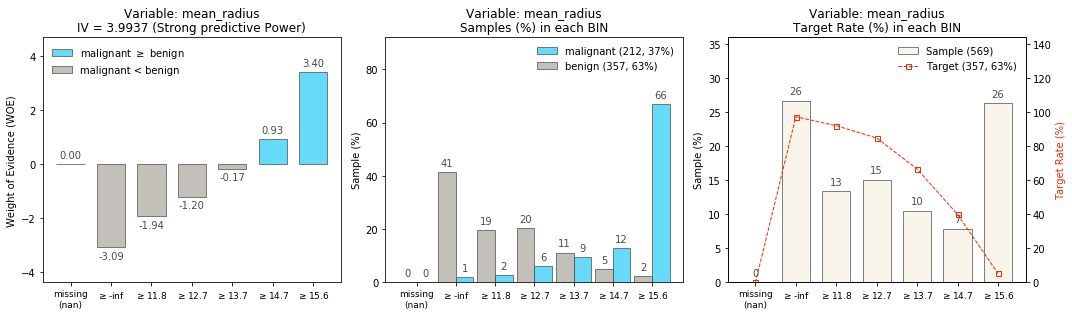

In [5]:
plot_class = plot_woe(**{'labels':tuple(data().target_names)})
plot_class.plot(ev_class.woe_df)

**<font size=4 color='#0984e3'> ( 4 ) batch_binning </font>**

- Exhaustive search over specified parameter values for `woe_binning` class. 
- `batch_binning` implements `woe_binning.fit`, `evaluate_bins.woe_df`, and `plot_woe.plot` methods. 

**Note :** view more information
- print( batch_binning.\_\_doc_\_ ) to view method.
- print( batch_binning.\_\_init_\_.\_\_doc_\_ ) to view arguments.

In [6]:
params = {'use_equal_bin': False,
          'param_grid':{'method':['gini','mono'], 
                        'equal_bin':[None,5,6], 
                        'n_step':[15,30],
                        'sub_step':20,
                        'n_order':[2,None],
                        'random_state':100}}
batch_class = batch_binning(**params)

There are 6 combinations.


`param_grid` is set based upon the following criteria;

1. Any argument that is not assigned a new value to, defaults to original values as shown in the table below;
    
|    Argument    |   Default   | 
|:--------------:|:-----------:|
|**trend**       |    'auto'   |
|**n_order**     |      1      | 
|**random_state**|     None    |
|**equal_bin**   |     None    |
|**n_step**      |      20     | 
|**sub_step**    |      10     |
|**method**      |     'iv'    | 
|**min_pct**     |     0.05    |
|**min_labels**  | (0.01,0.01) |
|**chi_alpha**   |     0.05    | 
|**p_value**     |     0.05    |     
    
   
2. When `n_order` is an integer, this overrides random function, where it generates random `n_order`. Therefore, `random_state` is no longer necessary and shall be assigned to `None`.

3. When `equal_bin` is an integer, it overrides the binning function that relates to `n_step`, and `sub_step`. Hence, setting such parameters to default values helps eliminate duplicates.

4. When `use_equal_bin` is `False`, `equal_bin` defaults to `None` and becomes inactive. Since `equal_bin` tends to generate more bins than `np.nanpercentile`, so it would be time consuming when top-down approach (e.g. `gini`) is selected, particularly, when `batch_binning` is implemented with large dataset and multiple variables. <font color='red'> It is highly recommneded to set `use_equal_bin` to False. </font>

---
View product of input arguments (combinations).

In [8]:
pd.DataFrame(batch_class.combinations.values())

,chi_alpha,equal_bin,method,min_labels,min_pct,n_order,n_step,p_value,random_state,sub_step,trend
0,0.0500,nan,gini,"(0.01, 0.01)",0.0500,2.0000,20,0.0500,nan,20,auto
1,0.0500,nan,mono,"(0.01, 0.01)",0.0500,1.0000,15,0.0500,nan,10,auto
2,0.0500,nan,mono,"(0.01, 0.01)",0.0500,1.0000,30,0.0500,nan,10,auto
3,0.0500,5.0000,mono,"(0.01, 0.01)",0.0500,1.0000,20,0.0500,nan,10,auto
4,0.0500,6.0000,mono,"(0.01, 0.01)",0.0500,1.0000,20,0.0500,nan,10,auto
5,0.0500,nan,gini,"(0.01, 0.01)",0.0500,nan,20,0.0500,100.0000,20,auto


For the sake of demonstartion, we only use 3 variables, which are `mean_radius`, `smoothness_error`, and `concave_points_error` as `X` for `batch_class`.

In [9]:
batch_class.fit(y, X[['mean_radius',
                      'smoothness_error',
                      'concave_points_error']])

method : gini, combination : 6, round : 6


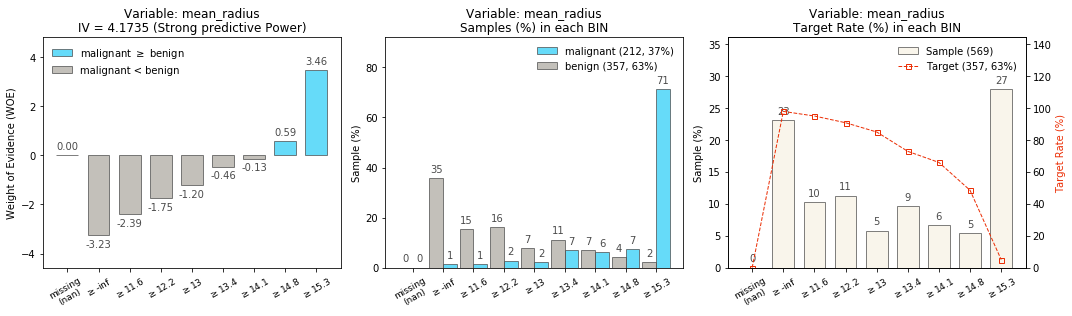

method : gini, combination : 1, round : 13


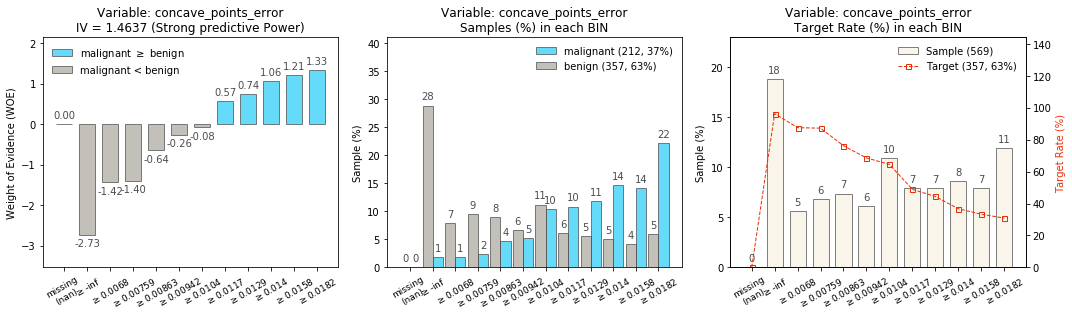

In [10]:
plot_dict = {'labels':tuple(data().target_names),
             'xticklabelsdict':{'rotation':30}}
batch_class.plot(**plot_dict)

Only 2 variables make the cutoff. For more detail about `batch_class` please see codes below;

    Cutoff calculation and its required parameters.
    >>> print(batch_class.importance_order.__doc__)
    
    Measuring metrics of each iteration.
    >>> pd.DataFrame(batch_class.data['log'])
    
    Result of all binnings.
    >>> pd.DataFrame(batch_class.data['data'])
    
    Binning method that scores the highest for each variable.
    >>> pd.DataFrame(batch_class.data['best_bins'])
    
    Parameter grid (dictionary).
    >>> batch_class.data['combinations']

**<font size=4 color='#0984e3'> ( 5 ) woe_transform </font>**

- `woe_transform` is used to transform `X` to `Weight of Evidence`.
- Both number and name of variables from `X` must match exactly with `woe_df`.
- see print( woe_transform.\_\_doc_\_ ) for more information.
---
From `batch_class`, we have arrived with variables, whose score is the highest from various sets of parameters, which are from round 6, and 13, respectively.

In [11]:
woe_df = pd.DataFrame(batch_class.data['data'])
woe_df = woe_df.loc[woe_df['round'].isin([6,13])]

In [12]:
transformed_X = woe_transform(X,woe_df)

In [13]:
transformed_X.sample(5)

,mean_radius,concave_points_error
290,-0.0767,1.3268
50,-1.4248,-1.4248
157,0.7443,-0.0767
307,-2.7273,-2.7273
379,-2.7273,0.7443
